<a href="https://colab.research.google.com/github/Felipepa9/MADSI/blob/main/Seccion_2_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 10

IMPORTACIÓN DEL DATASET

In [3]:
data = pd.read_csv('/content/drive/MyDrive/MOD. Y SIST. INTELIGENTES/Seccion_2.csv')
data.head()

,origin_leg_airport_iata_code,destination_leg_airport_iata_code,business_type,taxi_fuel_kg_qty,trip_fuel_kg_qty,extra_fuel_kg_qty,fuel_profitability
0,BOG,MIA,A320,480,6679,463,3
1,BOG,MIA,A320,384,6707,618,3
2,BOG,MIA,A320,288,6922,938,3
3,BOG,MIA,A320,480,7456,1079,3
4,BOG,MIA,A320,480,7604,549,3


PREPARACIÓN DE LOS DATOS

In [4]:
data.describe()

,taxi_fuel_kg_qty,trip_fuel_kg_qty,extra_fuel_kg_qty,fuel_profitability
count,6141.000000,6141.000000,6141.000000,6141.000000
mean,594.869728,24883.396027,1199.942843,2.140205
std,168.563712,13183.490634,1246.855397,0.509883
min,200.000000,6679.000000,0.000000,1.000000
25%,475.000000,15373.000000,0.000000,2.000000
50%,560.000000,16923.000000,1045.000000,2.000000
75%,800.000000,41491.000000,1831.000000,2.000000
max,1200.000000,58901.000000,28994.000000,3.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6141 entries, 0 to 6140
Data columns (total 7 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   origin_leg_airport_iata_code       6141 non-null   object
 1   destination_leg_airport_iata_code  6141 non-null   object
 2   business_type                      6141 non-null   object
 3   taxi_fuel_kg_qty                   6141 non-null   int64 
 4   trip_fuel_kg_qty                   6141 non-null   int64 
 5   extra_fuel_kg_qty                  6141 non-null   int64 
 6   fuel_profitability                 6141 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 336.0+ KB


In [6]:
data.loc[data['origin_leg_airport_iata_code'] == 'BOG', 'origin_leg_airport_iata_code'] = 1
data.loc[data['origin_leg_airport_iata_code'] == 'LIM', 'origin_leg_airport_iata_code'] = 2
data.loc[data['origin_leg_airport_iata_code'] == 'SCL', 'origin_leg_airport_iata_code'] = 3

data['origin_leg_airport_iata_code'] = pd.to_numeric(data['origin_leg_airport_iata_code'], errors='coerce').astype('Int64')

data.head()

,origin_leg_airport_iata_code,destination_leg_airport_iata_code,business_type,taxi_fuel_kg_qty,trip_fuel_kg_qty,extra_fuel_kg_qty,fuel_profitability
0,1,MIA,A320,480,6679,463,3
1,1,MIA,A320,384,6707,618,3
2,1,MIA,A320,288,6922,938,3
3,1,MIA,A320,480,7456,1079,3
4,1,MIA,A320,480,7604,549,3


In [7]:
data = data.drop('destination_leg_airport_iata_code', axis=1)
data.head()

,origin_leg_airport_iata_code,business_type,taxi_fuel_kg_qty,trip_fuel_kg_qty,extra_fuel_kg_qty,fuel_profitability
0,1,A320,480,6679,463,3
1,1,A320,384,6707,618,3
2,1,A320,288,6922,938,3
3,1,A320,480,7456,1079,3
4,1,A320,480,7604,549,3


In [8]:
data['business_type'] = data['business_type'].astype(str).str.replace('A', '', regex=False).str.replace('B', '', regex=False)
data['business_type'] = pd.to_numeric(data['business_type'], errors='coerce').astype('Int64')

data.head()

,origin_leg_airport_iata_code,business_type,taxi_fuel_kg_qty,trip_fuel_kg_qty,extra_fuel_kg_qty,fuel_profitability
0,1,320,480,6679,463,3
1,1,320,384,6707,618,3
2,1,320,288,6922,938,3
3,1,320,480,7456,1079,3
4,1,320,480,7604,549,3


RECONOCIMIENTO DEL DATASET



In [9]:
data.describe()

,origin_leg_airport_iata_code,business_type,taxi_fuel_kg_qty,trip_fuel_kg_qty,extra_fuel_kg_qty,fuel_profitability
count,6141.0,6141.0,6141.000000,6141.000000,6141.000000,6141.000000
mean,1.784237,699.587852,594.869728,24883.396027,1199.942843,2.140205
std,0.863776,160.826931,168.563712,13183.490634,1246.855397,0.509883
min,1.0,320.0,200.000000,6679.000000,0.000000,1.000000
25%,1.0,763.0,475.000000,15373.000000,0.000000,2.000000
50%,1.0,763.0,560.000000,16923.000000,1045.000000,2.000000
75%,3.0,763.0,800.000000,41491.000000,1831.000000,2.000000
max,3.0,789.0,1200.000000,58901.000000,28994.000000,3.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6141 entries, 0 to 6140
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   origin_leg_airport_iata_code  6141 non-null   Int64
 1   business_type                 6141 non-null   Int64
 2   taxi_fuel_kg_qty              6141 non-null   int64
 3   trip_fuel_kg_qty              6141 non-null   int64
 4   extra_fuel_kg_qty             6141 non-null   int64
 5   fuel_profitability            6141 non-null   int64
dtypes: Int64(2), int64(4)
memory usage: 300.0 KB


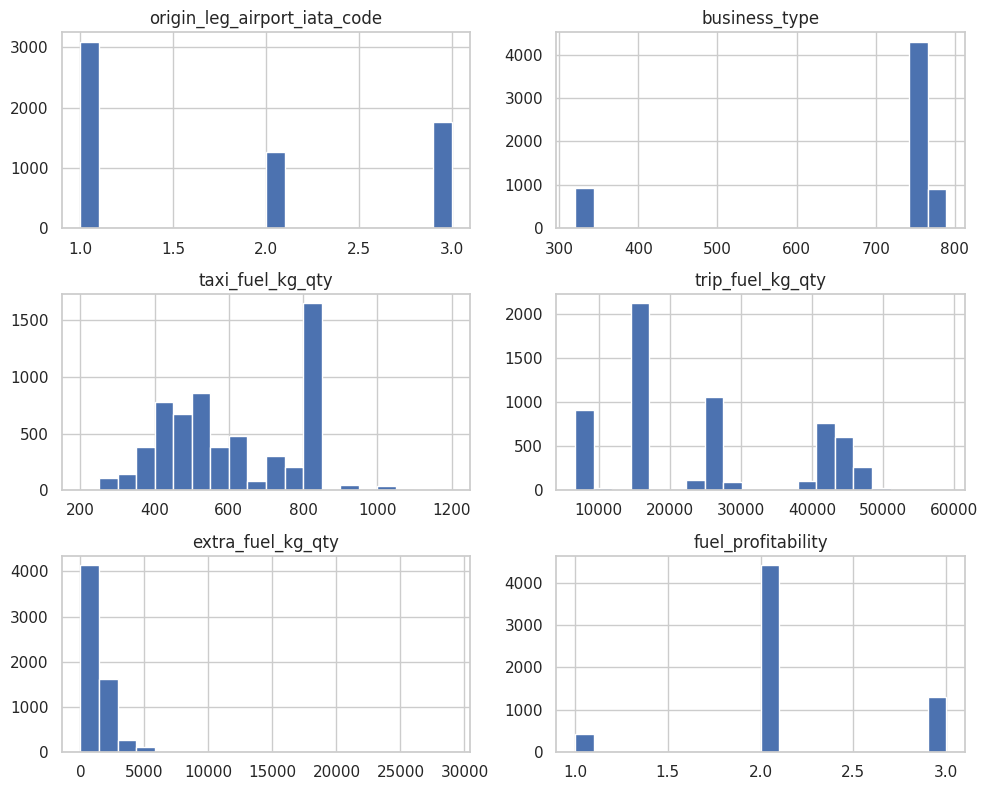

In [11]:
data.hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()

FORMULACIÓN DEL MODELO

In [12]:
feature_names = data.columns[:5].tolist()
feature_names

['origin_leg_airport_iata_code',
 'business_type',
 'taxi_fuel_kg_qty',
 'trip_fuel_kg_qty',
 'extra_fuel_kg_qty']

In [13]:
data['TIPO_RENTAB'] = data['fuel_profitability'].map({
        1: 'baja',
        2: 'media',
        3: 'alta'
    })

data.head()

,origin_leg_airport_iata_code,business_type,taxi_fuel_kg_qty,trip_fuel_kg_qty,extra_fuel_kg_qty,fuel_profitability,TIPO_RENTAB
0,1,320,480,6679,463,3,alta
1,1,320,384,6707,618,3,alta
2,1,320,288,6922,938,3,alta
3,1,320,480,7456,1079,3,alta
4,1,320,480,7604,549,3,alta


In [33]:
    X = data[feature_names]
    y = data['fuel_profitability']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED, stratify=y)

    print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]} muestras.")
    print(f"Tamaño del conjunto de prueba: {X_test.shape[0]} muestras.")
    print(f"\nDimensiones: X_train: {X_train.shape}, y_train: {y_train.shape}, X_test: {X_test.shape}, y_test: {y_test.shape}")

Tamaño del conjunto de entrenamiento: 4912 muestras.
Tamaño del conjunto de prueba: 1229 muestras.

Dimensiones: X_train: (4912, 5), y_train: (4912,), X_test: (1229, 5), y_test: (1229,)


In [42]:
    num_features = X_train.shape[1]

    num_classes = len(y_train.unique())

    y_train_encoded = to_categorical(y_train - 1, num_classes=num_classes)
    y_test_encoded = to_categorical(y_test - 1, num_classes=num_classes)

    l2_lambda=0.001
    dropout_rate=0.3

    model = Sequential([
        Dense(64, activation='relu', input_shape=(num_features,), kernel_regularizer=regularizers.l2(l2_lambda)),

        Dropout(dropout_rate),
        Dense(32, activation='relu', kernel_regularizer=regularizers.l2(l2_lambda)),

        Dropout(dropout_rate),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

    print("\nResumen del modelo:")
    model.summary()


Resumen del modelo:


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 64)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,563 (10.01 KB)

 Trainable params: 2,563 (10.01 KB)

 Non-trainable params: 0 (0.00 B)